In [46]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier


#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [47]:
df = pd.read_csv("winequality-red.csv",sep=';')

In [48]:
print("Rows, columns: " + str(df.shape))

df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
fig = px.histogram(df,x='quality')
fig.show()

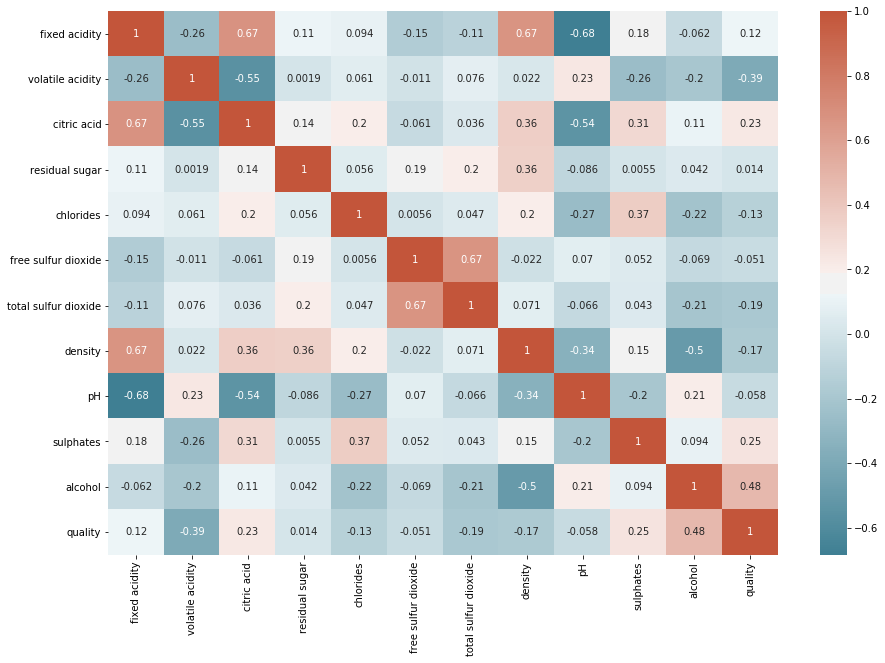

In [52]:
corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [53]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [54]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [55]:
# Normalize feature variables
import pickle
from sklearn.preprocessing import StandardScaler
X_features = X
preprocess_scaling = StandardScaler()
X = preprocess_scaling.fit_transform(X)
pickle.dump(preprocess_scaling,open('preprocess_scale','wb'))

In [56]:
# Splitting the data
from sklearn.model_selection import train_test_split
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

Epoch 1/50
1279/1279 [==============================] - 0s 132us/step - loss: 0.6360 - accuracy: 0.8280
Epoch 2/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.4827 - accuracy: 0.8694
Epoch 3/50
1279/1279 [==============================] - 0s 27us/step - loss: 0.3613 - accuracy: 0.8694
Epoch 4/50
1279/1279 [==============================] - 0s 27us/step - loss: 0.3167 - accuracy: 0.8694
Epoch 5/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.2912 - accuracy: 0.8694
Epoch 6/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.2797 - accuracy: 0.8710
Epoch 7/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.2730 - accuracy: 0.8757
Epoch 8/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.2650 - accuracy: 0.8874
Epoch 9/50
1279/1279 [==============================] - 0s 26us/step - loss: 0.2605 - accuracy: 0.8882
Epoch 10/50
1279/1279 [==============================] - 0s 26us/step - 

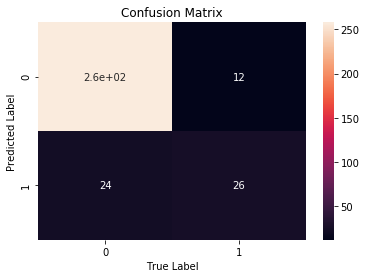

In [57]:
# Functionalize model fittting
import pickle
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def simple_neural_network():
    clf = Sequential()
    clf.add(Dense(units=128,input_dim = 11, activation = 'relu'))
    #clf.add(Dropout(0.2))
    clf.add(Dense(units=64, activation = 'relu'))
    #clf.add(Dropout(0.2))
    clf.add(Dense(units=32, activation = 'relu'))
    #clf.add(Dropout(0.2))
    clf.add(Dense(units=16, activation = 'relu'))
    #clf.add(Dropout(0.2))
    clf.add(Dense(units=8, activation = 'relu'))
    clf.add(Dense(units=1, activation = 'sigmoid'))
    
    clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
      
    return clf

# Functionalize model fittting
def FitModel_NN(X,Y,algo_name,algorithm):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    algorithm.fit(x_train,y_train,batch_size=100,epochs=50)
    cf_mtrx = confusion_matrix(y_test, algorithm.predict(x_test))
    ax = sns.heatmap(cf_mtrx, annot=True)
    ax.set(title="Confusion Matrix",
      xlabel="True Label",
      ylabel="Predicted Label")
    pickle.dump(algorithm,open(algo_name,'wb'))
FitModel_NN(X,y,'Neural_network',KerasClassifier(build_fn=simple_neural_network))

In [58]:
# Functionalize model fittting
def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    grid = GridSearchCV(
    estimator=algorithm,
    param_grid=gridSearchParams,
    cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

    grid_result = grid.fit(x_train, y_train)
    #best_params = grid_result.best_params_
    #pred = grid_result.predict(x_test)

    cf_mtrx = confusion_matrix(y_test, grid_result.predict(x_test))
    ax = sns.heatmap(cf_mtrx, annot=True)
    ax.set(title="Confusion Matrix",
      xlabel="True Label",
      ylabel="Predicted Label")
   # metrics =grid_result.gr
    pickle.dump(grid_result,open(algo_name,'wb'))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


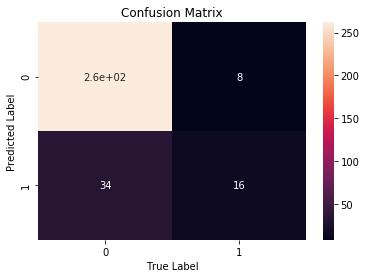

In [59]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X,y,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished


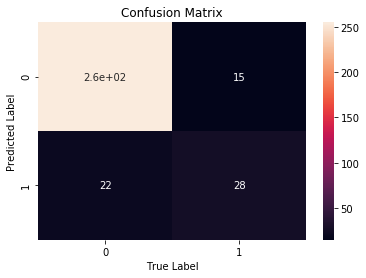

In [60]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,y,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.6s finished


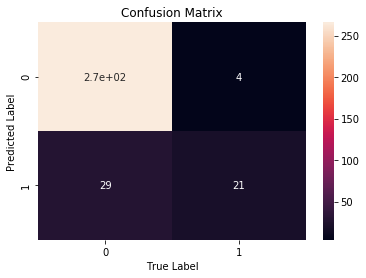

In [61]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
           
        }
FitModel(X,y,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 101 out of 140 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


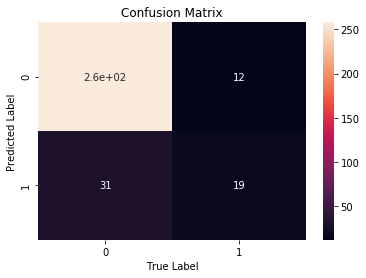

In [62]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X,y,'SVC',SVC(),param,cv=5)

In [63]:
import streamlit as st

st.write("""
# Test
This app does
""")

st.sidebar.header('User Input Parameters')

def user_input_features():
    V1 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V2 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V3 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V4 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    data = {'V1': V1,
           'V2': V1,
           'V3': V1,
           'V4': V1,
           'V5': V1,
           'V6': V1,
           'V7': V1,
           'V8': V1,
           'V9': V1,
           'V10': V1,
           'normAmount': V1
           }
    features= pd.DataFrame(data, index=[0])
    return features
df =  user_input_features()
st.subheader('User Input parameters')
st.write(df)

filename = 'Neural_network'
model = pickle.load(open(filename,'rb'))
pred = model.predict(df)
st.subheader('Prediction')
st.write(pred)
st.subheader('Prediction')
st.write(pred)
st.subheader('Prediction')
st.write(pred)


In [72]:
import streamlit as st
import pandas as pd
import pickle

#import keras.backend.tensorflow_backend as tb
#tb._SYMBOLIC_SCOPE.value = True
st.write("""
# Credit Card Fraud Detection deployed using streamlit
For this project, I made use of Kaggle's Red Wine Quality dataset to build a logistic regression model to predict whether a particular wine is "good quality" or not based on physicochemical qualities. The objective of this project is to experiment with various classification methods to determine which model yields the highest accuracy and also determine the features which are most indicative of a good quality wine.
""")

st.sidebar.header('Wine Input Features')

# Functionalize model fittting
import pickle

def user_input_features():
    V1 = st.sidebar.slider('Fixed Acidity', 4.6, 16.0, 8.0)
    V2 = st.sidebar.slider('Volatile Acidity', 0.1, 1.6, 0.5)
    V3 = st.sidebar.slider('Citric Acid', 0.0, 1.0, 0.3)
    V4 = st.sidebar.slider('Residual Sugar', 0.9, 15.5, 2.5)
    V5 = st.sidebar.slider('Chlorides', 0.0, 0.7, 0.1)
    V6 = st.sidebar.slider('Free Sulfur Dioxide', 1.0, 72.0, 16.0)
    V7 = st.sidebar.slider('Total Sulfur Dioxide', 1.0, 289.0, 46.0)
    V8 = st.sidebar.slider('Density', 0.9, 1.1, 0.99)
    V9 = st.sidebar.slider('pH', 2.7, 4.0, 3.3)
    V10 = st.sidebar.slider('Sulphates', 0.33, 2.0, 0.6)
    V11 = st.sidebar.slider('Alchohol', 8.4, 14.9, 10.4)
    data = {'Fixed Acidity': V1,
           'Volatile Acidity': V2,
           'Citric Acid': V3,
           'Residual Sugar': V4,
           'Chlorides': V5,
           'Free Sulfur Dioxide': V6,
           'Total Sulfur Dioxide': V7,
           'Density': V8,
           'pH': V9,
           'Sulphates': V10,
           'Alchohol': V11
           }

    features= pd.DataFrame(data, index=[0])
    return features
df =  user_input_features()
st.subheader('Wine Input Features')
st.write(df)

filename = 'LogisticRegression'
model = pickle.load(open(filename,'rb'))
preprocess = pickle.load(open('preprocess_scale','rb'))
pred = model.predict(preprocess.transform(df))
st.subheader('Prediction - 1 denotes good quality wine, 0 denotes bad quality wine')

In [64]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [65]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [66]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [67]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.57      0.56      0.56        45

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400



[Text(33.0, 0.5, 'Predicted Label'),
 Text(0.5, 15.0, 'True Label'),
 Text(0.5, 1, 'Confusion Matrix')]

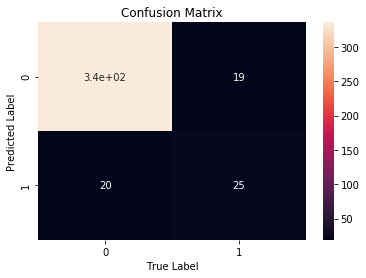

In [68]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
ax.set(title="Confusion Matrix",
  xlabel="True Label",
  ylabel="Predicted Label")


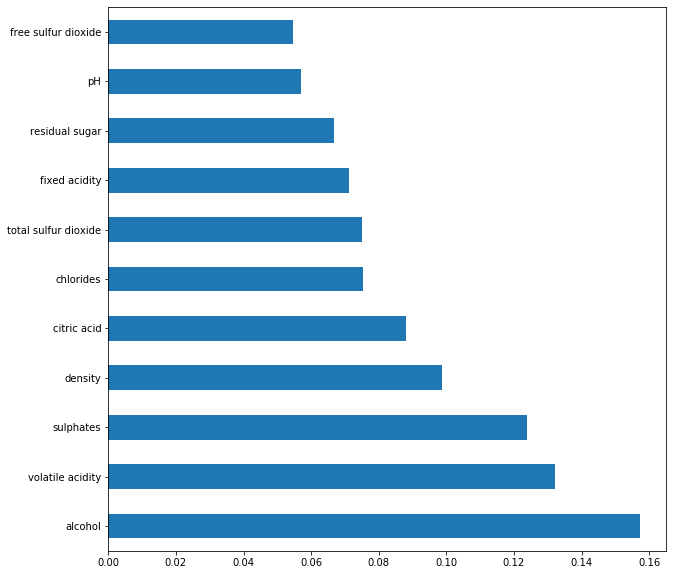

In [69]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

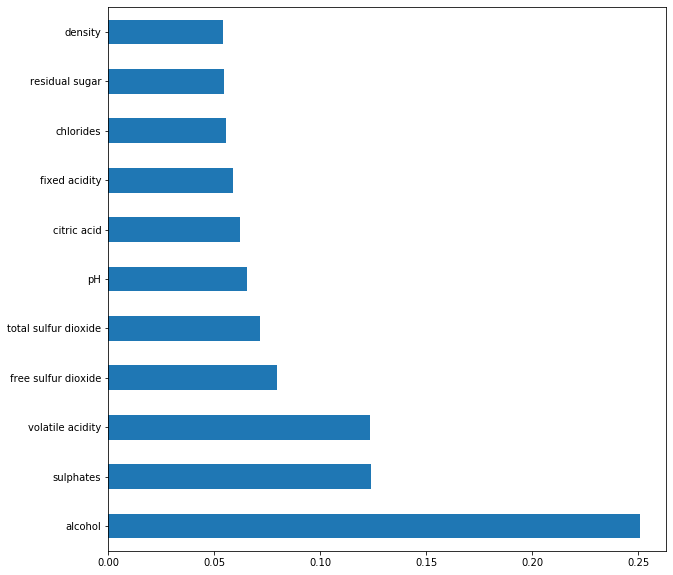

In [70]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [71]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

KeyError: 'goodquality'